In [ ]:
#Import the dataset 
from google.colab import files
uploaded = files.upload()
# import the python module pandas with the abbreviation pd
import pandas as pd

# Read the data in the iris.csv file into a dataframe
# If you work on colab, you need the data file on colab of course
df = pd.read_csv('ZOL002745_clean.csv',delimiter=';') 
df.head() # print data

Saving ZOL002745_clean.csv to ZOL002745_clean.csv


,Date,Time,Latitude,Longitude,Altitude,Speed,Course,Type,Distance,Essential,uncorrected_time,TIME,TIMEDIFF,Zone36_Lon,Zone36_Lat,DIST,SPEED,corrected_date
0,01.06.2017,15:43:57,0.126643,34.052883,447.96,8208,332,0,140.88,1,01.06.2017 15:43,01.06.2017 18:43,NaN,617165.8714,14000.23657,NaN,NaN,01.06.2017
1,01.06.2017,15:56:53,0.126746,34.054043,763.84,1224,328,0,129.49,1,01.06.2017 15:56,01.06.2017 18:56,776.0,617294.9715,14011.62835,129.601779,0.601245,01.06.2017
2,01.06.2017,16:17:45,0.126893,34.055069,1182.92,4176,111,0,115.25,1,01.06.2017 16:17,01.06.2017 19:17,1252.0,617409.1582,14027.88369,115.337875,0.331642,01.06.2017
3,01.06.2017,16:29:07,0.125649,34.053955,1137.74,10620,351,0,185.68,1,01.06.2017 16:29,01.06.2017 19:29,682.0,617285.1826,13890.35583,185.158998,0.977379,01.06.2017
4,01.06.2017,16:39:48,0.127698,34.053997,1122.07,9792,249,0,227.89,1,01.06.2017 16:39,01.06.2017 19:39,641.0,617289.8477,14116.87068,226.562882,1.272428,01.06.2017


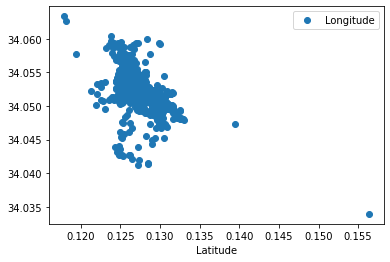

In [ ]:
import numpy as np
import pandas as pd

df.plot(x='Latitude', y='Longitude', style='o')

In [ ]:
df = df[['Latitude', 'Longitude']]
df

,Latitude,Longitude
0,0.126643,34.052883
1,0.126746,34.054043
2,0.126893,34.055069
3,0.125649,34.053955
4,0.127698,34.053997
...,...,...
4360,0.129386,34.050156
4361,0.129097,34.050106
4362,0.129322,34.050140
4363,0.129501,34.050087


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.mixture import GaussianMixture

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from matplotlib import  pyplot as plt
import numpy as np
import pandas as pd
from imageio import imread
from time import time as timer
import os
import tarfile

import tensorflow as tf

%matplotlib inline
from matplotlib import animation
from IPython.display import HTML

from scipy.stats import entropy

In [ ]:
clusterer = KMeans(n_clusters=4, random_state=10)


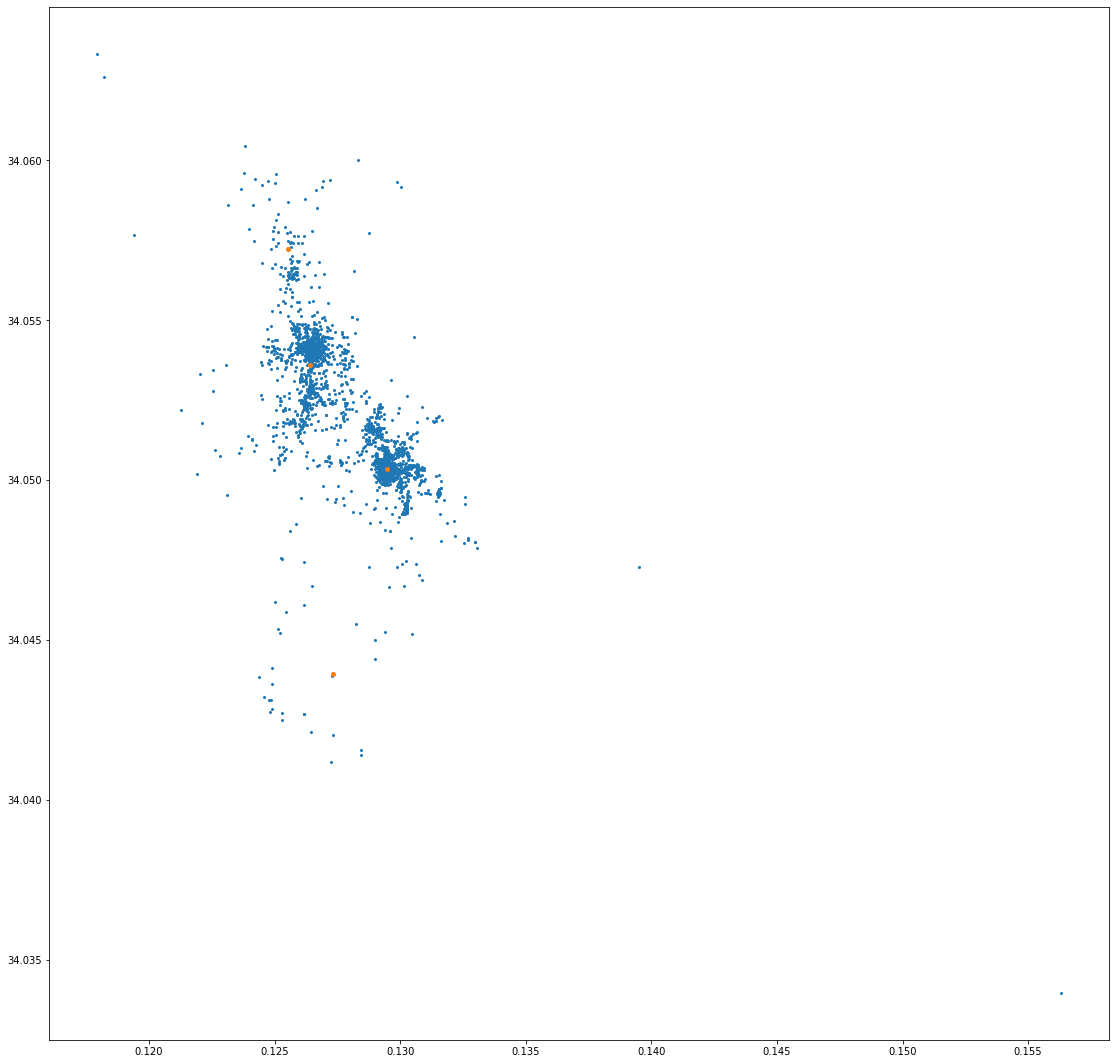

In [ ]:
#%matplotlib notebook

plt.figure(figsize=(19,19))
clusterer.fit(df)
plt.plot(list(df.iloc[:,0]),list(df.iloc[:,1]),'o',markersize=2)
plt.plot(clusterer.cluster_centers_[:,0],clusterer.cluster_centers_[:,1],'o',markersize=4)

In [ ]:
#list(df.iloc[:,0])

In [ ]:
#plt.figure(figsize=(19,19))
#clusterer.fit(df)
#plt.plot(df.iloc[:,0],df.iloc[:,1],'o',markersize=2)
#plt.plot(clusterer.cluster_centers_[:,0],clusterer.cluster_centers_[:,1],'o',markersize=2)

In [ ]:
#import matplotlib.pyplot as plt
#import numpy as np

#plt.plot(np.arange(10))
#plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
clusterer.cluster_centers_[:,:]

array([[ 0.1294364 , 34.0502671 ],
       [ 0.12631131, 34.0539294 ]])

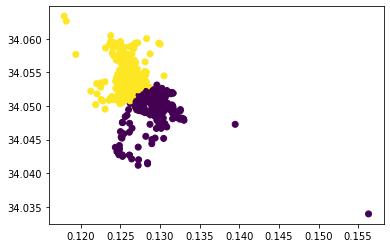

In [ ]:
cluster_labels=clusterer.predict(df)
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=cluster_labels)
plt.show()

In [ ]:
res= [] #vamos fazer uma análise de que clusters serão melhores; quando o gráfico abaixo começar a descer, o ponto com o valor mais alto é o número óptimo de clusters
for n_clusters in range(2,20) :
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df)
    score=silhouette_score(df,cluster_labels)
    res.append(score)
    res

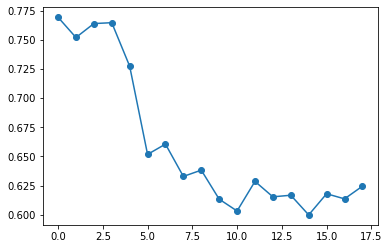

In [ ]:
plt.plot(res,'-o') #adicionar os pontos à linha

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster import hierarchy
from ipywidgets import interact
from scipy.cluster.hierarchy import fcluster

Z = hierarchy.linkage(df, 'single')
n_clusters=int(np.max(Z[:,[0,1]].flatten()))
print(n_clusters)

8727


interactive(children=(FloatSlider(value=3.0, description='t', max=7.0), Output()), _dom_classes=('widget-inter…

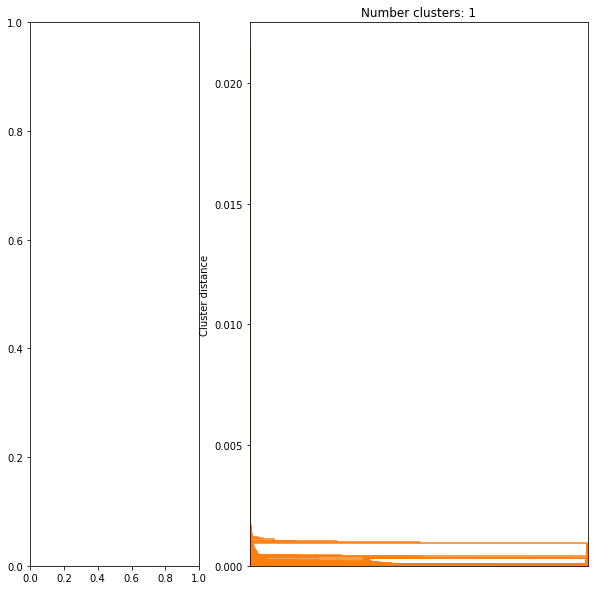

<Figure size 1368x360 with 0 Axes>

In [ ]:
@interact
def plot(t=(0,7,0.1)):  
    fig, axes=plt.subplots(1,2,figsize=(10,10), gridspec_kw={'width_ratios': [1, 2]})
    fl = fcluster(Z,t=t,criterion='distance')
    maps={}
    for clust in range(n_clusters):
        maps[clust]=(fl==clust)
    c=0
    for clust in range(n_clusters):
        if np.sum(maps[clust])>0:
            c+=1
    plt.figure(figsize=(19,5))
    d = hierarchy.dendrogram(Z,ax=axes[1], color_threshold=t)
    axes[1].axhline(t,linestyle='--',color='red')
    axes[1].set_ylabel('Cluster distance')
    axes[1].axes.get_xaxis().set_visible(False)
    axes[1].set_xlabel('Points')
    axes[1].set_title(f'Number clusters: {c}')
    axes[0].scatter(df[d['leaves'],0],df[d['leaves'],1], color=d['leaves_color_list'])

2 -90140.50135576013 -90070.30624760913


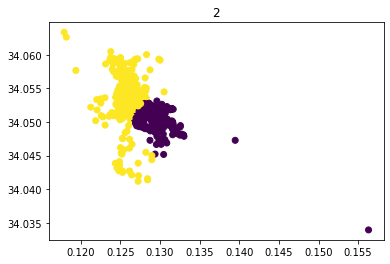

3 -92207.81499120875 -92099.3316422481


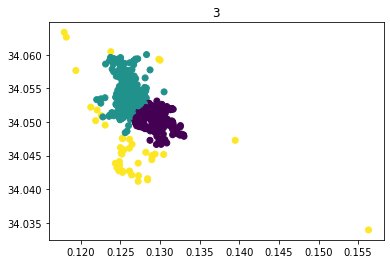

4 -92363.08329160302 -92216.31170183272


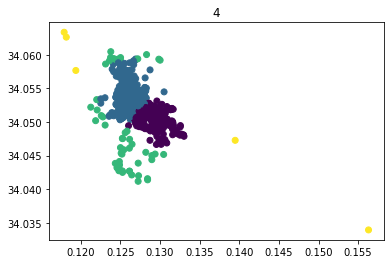

5 -92283.56803150573 -92098.50820092579


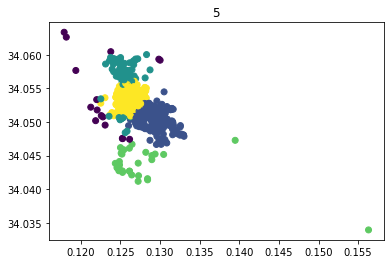

In [ ]:
#Gaussian

aic=[]
bic=[]
sil=[]

for i_comp in range(2,6):
    plt.figure()
    plt.title(str(i_comp))
    clf = GaussianMixture(n_components=i_comp, covariance_type='full')
    clf.fit(df)
    cluster_labels=clf.predict(df)
    plt.scatter(df.iloc[:,0],df.iloc[:,1],c=cluster_labels)
    print(i_comp,clf.aic(df),clf.bic(df))
    score=silhouette_score(df,cluster_labels)
    aic.append(clf.aic(df))
    bic.append(clf.bic(df))
    sil.append(score)
    plt.show()

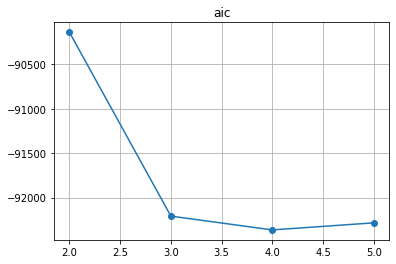

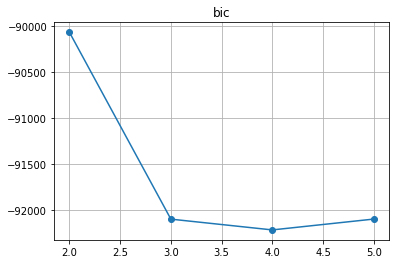

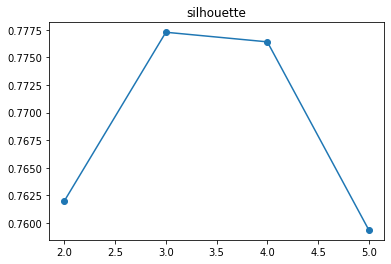

In [ ]:
plt.plot(np.arange(2,6),aic,'-o')
plt.title('aic')
plt.grid()
plt.show()

plt.plot(np.arange(2,6),bic,'-o')
plt.title('bic')
plt.grid()
plt.show()

plt.plot(np.arange(2,6),sil,'-o')
plt.title('silhouette')
plt.show()